<a href="https://colab.research.google.com/github/Rhino-byte/Food-Image-classification/blob/model_evaluation/FOOD_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding
In the rapidly evolving food industry, the ability to accurately classify food items through images is becoming increasingly critical. As consumers demand more personalized and efficient services, businesses are seeking innovative solutions to enhance their operational efficiency and customer satisfaction. The integration of AI-powered food image classification can revolutionize various aspects of the food ecosystem and  restaurant operations . By automating food identification, businesses can streamline processes, reduce human error, and provide a more engaging user experience.


## Problem statement
Accurate food classification remains a challenge in the food industry, affecting restaurants, delivery platforms, and nutrition tracking apps. Manual identification leads to errors in  menu categorization and automated checkouts.

`An AI-powered food classification model can automate this process with high accuracy, reducing errors, improving user experience, and enhancing operational efficiency.`

## Project Goals
### Optimization Strategies
Improving accuracy beyond 78% is crucial for reliable food identification. Advanced deep learning techniques, data augmentation, and model optimization can enhance classification performance, reducing errors in real-world applications.

### Impact on Automation and Service Efficiency
AI-powered food classification can streamline restaurant operations, minimize human error, and improve service efficiency. In food delivery, it optimizes workflow, enhances order accuracy, and reduces delays.


### Scalability and Real-World Application
For widespread adoption, the model must handle diverse food categories efficiently. Ensuring accuracy in automated checkouts, menu categorization, and large-scale applications is key to real-world feasibility.



## Stakeholders
##### Restaurants and Food Service Providers
They will benefit from improved operational efficiency, reduced errors in order processing, and enhanced customer satisfaction.
Food Delivery Platforms

-These platforms can leverage accurate food classification to streamline their logistics, improve menu categorization, and enhance user experience.

##### Consumers
End-users will gain from more accurate  personalized dietary recommendations, and a more seamless food ordering experience.

##### Health and Nutrition Apps
These applications can utilize the classification model to provide users with better insights into their dietary habits and nutritional intake.

##### Data Scientists and AI Developers
Professionals in this field will be engaged in developing and refining the classification model, contributing to advancements in AI technology.

## Beneficiaries
##### Consumers
They will experience improved accuracy in food selection

##### Restaurants
Enhanced operational efficiency and reduced errors will lead to cost savings and improved customer loyalty.

##### Food Delivery Services
Improved accuracy in food classification will streamline operations, reduce delivery times, and enhance customer satisfaction.

##### Health Professionals
They can utilize accurate food classification data to provide better dietary advice and support to their clients.

##### Technology Providers
Companies developing AI solutions will benefit from the demand for advanced food classification technologies, leading to potential partnerships and revenue growth.

`By addressing these business questions and engaging the identified stakeholders and beneficiaries, the project can create a significant impact on the food industry, enhancing both operational efficiency and consumer experience.`

## Data Understanding
The Food-101 dataset is a large-scale image dataset containing 101,000 images spanning 101 food categories, with 1,000 images per class. It was introduced in the paper "Food-101 – Mining Discriminative Components with Random Forests" by Lukas Bossard, Matthieu Guillaumin, and Luc Van Gool.

These libraries are essential for building and training the AI model using TensorFlow and accessing the Food-101 dataset.

In [1]:
# Import modules
import tensorflow as tf
import tensorflow_datasets as tfds


##### Dataset Structure
*Training Set*: 75,750 images (750 per class)

*Test Set*: 25,250 images (250 per class)

*Image Format*: RGB, 512 × 512 pixels

*Classes*: 101 different food items, including dishes like pizza, sushi, steak, and ramen



##### Data Characteristics
*Imbalance*: The dataset is evenly distributed across all 101 food categories.

*Quality Issues*: The training set contains some noisy labels, making it slightly challenging for model training.

*Data Augmentation*: Since the dataset lacks variations in angles, lighting, and occlusions, augmentation techniques like
rotation, flipping, and color jittering can improve model generalization.

##### Data-Source ; tensorflowdatasets(tfds)
tfds- is an online source[https://www.tensorflow.org/datasets/catalog/food101?hl=en]

In [ ]:
# List all available datasets and check if the Food101 dataset is present in the tensorflow dataset
dataset_list =tfds.list_builders()
print('food101' in dataset_list)


True


##### This code checks for the availability of the Food-101 dataset and loads the training and test data, which is crucial for model training and evaluation.

In [ ]:
# Load in the data () Takes a while atleast 10 minutes
(train_data,test_data), ds_info =tfds.load(name = 'food101',
                                           split = ['train','validation'],
                                           shuffle_files=True,
                                           as_supervised=True, # data gets returned in tuple format (data,label)
                                           with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

##### Importance of the Dataset
The Food-101 dataset is a widely used benchmark for food classification, offering 101,000 images across 101 diverse food categories. It is valuable for applications like restaurant recommendation systems, calorie estimation, and AI-driven dietary monitoring.

The dataset supports ;

*Fine-Grained Classification: Allows for detailed and accurate classification of similar food items.*

*State-of-the-Art Models: Leverages advanced models for robust and efficient performance.*

*Global Variety: Ensures models are generalizable across diverse culinary contexts.*

*Real-World Noisy Labels: Prepares models to handle imperfections and real-world conditions.*

## Inspect the Food 101 dataset

### By becoming one with the data we aim to get:
* `class names` - we're working with 101 different food classes
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g are they one-hot encoded or are they label encoded)
* Do the labels match up with the class names?

*Understanding the class names helps in interpreting the model's predictions and evaluating its performance.*


In [ ]:
import matplotlib.pyplot as plt

In [6]:
#  Get the class names
class_names=ds_info.features['label'].names
print('Length:',len(class_names))
class_names[:10] # Extract the first 10 names

Length: 101


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [3]:
# Plot class distribution
labels = ds_info.features['label'].names
num_classes = len(labels)

In [4]:
# Take on sample of the train data
train_one_sample = train_data.take(1)  #(image_tensor,label)

In [ ]:
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [7]:
## Create a function that plots a given number of  random image from the TFDS Food101 dataset
def TFDS_plot(train_data,nrows=2,ncol=5,Class_names =class_names,plot_no =10):
  #Loop through the sample and extract the label and image

# Plot the data
   images = []
   labels=[]

   for image,label in train_data.take(plot_no):
      images.append(image),
      labels.append(label)

   plt.figure(figsize=(10,8))
   for i in range(plot_no):
      k = i+ 1
      plot_data=plt.subplot(nrows,ncol,k) # has to be adjusted based
      plot_data=plt.imshow(images[i])
      plot_data=plt.title(Class_names[labels[i].numpy()])
      plot_data=plt.axis('off')
      plot_data=plt.tight_layout()
      i += 1
   return plot_data

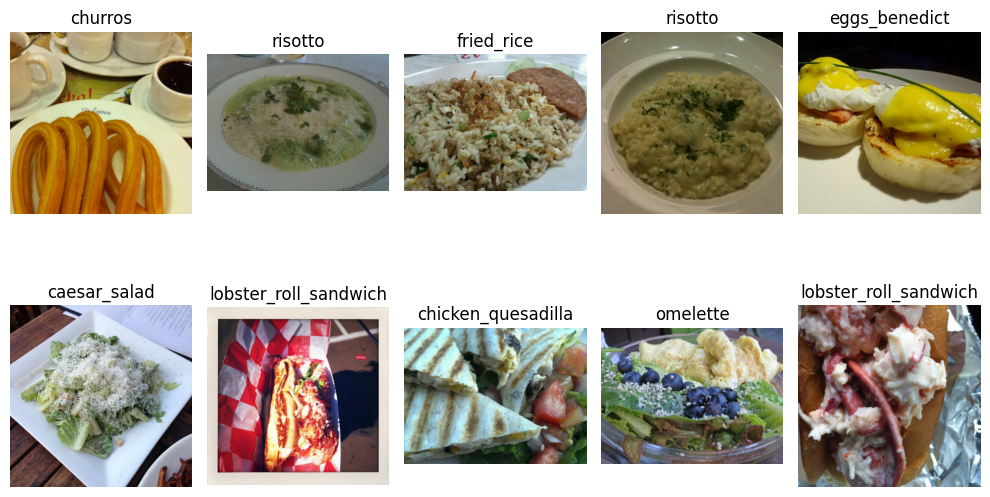

In [ ]:
TFDS_plot(train_data)

In [9]:
for image,labels in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from Food101 (tensor form): {labels}
  Class names (str form): {class_names[labels.numpy()]}
  """)


  Image shape: (512, 288, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 93
  Class names (str form): steak
  


In [ ]:
# How the image tensors look like
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 19,   6,   0],
        [ 29,  16,   8],
        [ 34,  21,  13],
        ...,
        [ 36,  19,   3],
        [ 35,  19,   3],
        [ 36,  20,   4]],

       [[ 20,   7,   0],
        [ 28,  15,   7],
        [ 34,  21,  13],
        ...,
        [ 37,  20,   4],
        [ 37,  20,   4],
        [ 37,  21,   5]],

       [[ 20,   7,   0],
        [ 25,  12,   4],
        [ 31,  18,  10],
        ...,
        [ 40,  21,   4],
        [ 40,  21,   4],
        [ 39,  22,   4]],

       ...,

       [[208, 206, 194],
        [209, 207, 195],
        [211, 209, 197],
        ...,
        [192, 196, 179],
        [190, 194, 177],
        [203, 207, 190]],

       [[208, 206, 194],
        [209, 207, 195],
        [210, 208, 196],
        ...,
        [203, 207, 190],
        [211, 214, 197],
        [202, 205, 186]],

       [[208, 206, 194],
        [209, 207, 195],
        [210, 208, 196],
        ...,
        [200, 204, 18

In [ ]:
# what are the min and max values of image tensor?
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

TensorShape([512, 288, 3])

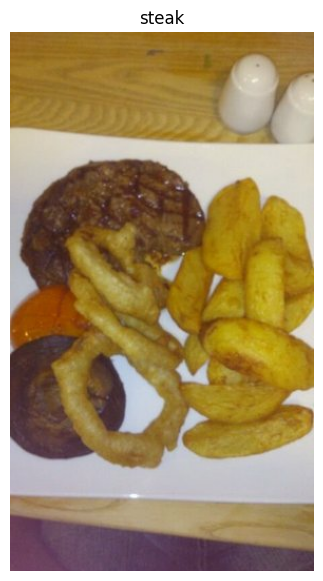

In [10]:
# PLot an image tensor
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(image)
plt.title(class_names[labels.numpy()])
plt.axis('off');
image.shape

### Data Augmentation

**Purpose**: expand the size of a training dataset by creating modified versions of images in the dataset. This is particularly important in image classification tasks where the model needs to generalize well to unseen data.

**ImageDataGenerator** enables effective data augmentation, improves model generalization, enhances robustness to variations in food images, and facilitates real-time data processing during training. By leveraging this tool, the project can achieve higher accuracy and better performance in classifying food items, ultimately leading to improved operational efficiency and customer satisfaction in the food industry.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

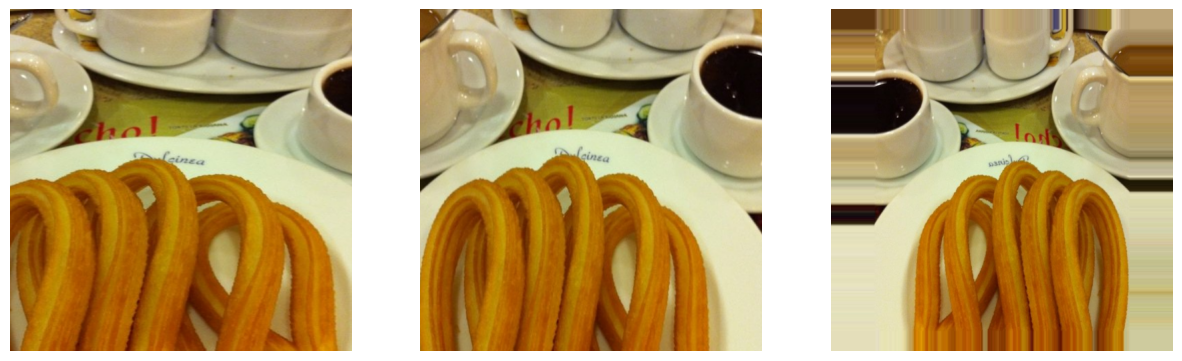

In [14]:
datagen = ImageDataGenerator(zoom_range =0.4,horizontal_flip=True,shear_range =0.3)

# Load an image
img_sample = train_data.take(1)

for img,label in img_sample:
  img,label


#  Add the image to a batch.
img = tf.cast(tf.expand_dims(img, 0), tf.float32)
# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')

	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')



## Data preprocessing

### Creating Preprocessing Functions for Our Data  

Neural networks achieve optimal performance when data is formatted in a specific way (e.g., batched, normalized, etc.). However, raw data—especially from TensorFlow datasets—often requires preprocessing to meet these requirements.  

#### Key Characteristics of Our Data:  
- Stored in `uint8` format  
- Contains images of varying sizes  
- Pixel values range from 0 to 255 (not yet normalized)  

#### What Our Model Prefers:  
- Data in `float32` format (or `float16`/`float32` for mixed precision)  
- Uniform image sizes within each batch  
- Scaled pixel values (0 to 1) for improved model performance  

#### Preprocessing Requirements:  
Since we are using an **EfficientNetBX** pretrained model from `tf.keras.applications`, explicit rescaling is unnecessary as these models include built-in rescaling.  

Thus, our preprocessing function should:  
1. Resize all images to a consistent shape.  
2. Convert image tensors from `uint8` to `float32`.

In [ ]:
#Prepare the images for the model by resizing and normalizing them, which is essential for optimal model performance.
# Make a function for preprocessing images
def preprocess_img(image,label,img_shape=224):
  """
  Converts image datatype from `uint8` -> `float 32` and reshapes
  the image shape and color channels-|
  [img_shape,img_shape,color channel]
  """
  image =tf.image.resize(image,[img_shape,img_shape]) # Reshape target image
  # image =image/255. # scale image value (Depends on the model in use)
  return tf.cast(image,tf.float32), label #return (float32_image, label) tuple

### Batch & Prepare datasets

We're going to make our data input pipeline run really fast.

*Importance: Efficient data loading and preprocessing improve training speed and model performance.*


For more resources on this, I'd highlighly recommend [Pipipeline Introduction:](https://www.tensorflow.org/guide/data)



In [ ]:
# Map preprocessing functions to training (and parallelize)
train_data =train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle train_data and turn it into batches and prefech it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size =32).prefetch(buffer_size = tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data =test_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
test_data =test_data.batch(32).prefetch(buffer_size =tf.data.AUTOTUNE) # No need to shuffle


In [ ]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

### Setup mixed precision training

Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory.

By keeping certain parts of the model in the 32-bit types for numeric stability, the model will have a lower step time and train equally as well in terms of the evaluation metrics such as accuracy, for a deeper understanding of mixed precision training

*check out the tensorflow guide for [mixed precision:](https://www.tensorflow.org/guide/mixed_precision)

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16') #Set global data to mixed precision

In [ ]:
mixed_precision.global_policy()#return the current setting for how TensorFlow manages numerical precision.

<DTypePolicy "mixed_float16">

## Build feature extraction model

Building a feature extraction model for food classification simplifies complex data, improves model performance, and reduces training time by distilling raw information (like images) into meaningful features.

It enables the model to capture critical patterns such as color, texture, and shape, which are essential for distinguishing between different food types. This process not only enhances classification accuracy but also helps handle variations in food images (e.g., lighting or background).

Additionally, feature extraction allows for transfer learning, leveraging pre-trained models to accelerate training and optimize performance, ultimately creating a more efficient and robust classification system.

In [ ]:
#Layer creation, data preprocessing tools.
from tensorflow.keras import layers
from tensorflow.keras import preprocessing

These components enable the construction of robust neural network architectures, facilitate effective data preparation, and enhance the model's ability to learn from the data, ultimately leading to improved classification accuracy and operational efficiency in the food industry.

### Fit the baseline model

In this section, we will train a base model with EfficientNetB0 for food classification with the following configurations:

1. 3 epochs of training.
2. Use the ModelCheckpoint callback to save the best model weights during training.
3. Integrate Weights & Biases (W&B) for experiment tracking.

In [ ]:
# Finding our best base model to proceed with fine-tuning
#  feature extraction model using EfficientNetB0, which is crucial for achieving high accuracy in food classification.
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Creating a Functional API model
inputs = layers.Input(shape=input_shape,name = "input_layer")
# Since the Efficient models have rescaling built-in we will not include a layer for that
# x = preprocessing.Rescaling(1/255.)(x)

x = base_model(inputs,training=False) # Just to enforce no updating the model weights
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)

# To make sure the output tensors are in float 32 for numerical stability
outputs = layers.Activation('softmax',dtype=tf.float32,name='Softmax_layer')(x)
model = tf.keras.Model(inputs,outputs)

# Compile model
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001))

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_3 (Cast)                        │ (None, 101)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax_layer (Activation)           │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
#check the dtype_pocies attribute of layers in our model
for layer in model.layers:
  print(layer.name,layer.trainable ,layer.dtype,layer.dtype_policy)

input_layer True float32 <DTypePolicy "mixed_float16">
efficientnetb0 False float32 <DTypePolicy "mixed_float16">
global_average_pooling2d_1 True float32 <DTypePolicy "mixed_float16">
dense_1 True float32 <DTypePolicy "mixed_float16">
Softmax_layer True float32 <DTypePolicy "float32">


In [ ]:
# Check if GPU is present
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-1c0f0562-6e4e-3eae-a948-789fdbefc9b0)


In [ ]:
# Install and prepare  wandb metrics
import wandb

from wandb.integration.keras import WandbMetricsLogger

**`Weights & Biases (W&B)` & `wandb`**- essential for effective experiment tracking, visualization of training metrics, hyperparameter tuning, collaboration, and model versioning.

By leveraging W&B, the project can achieve better insights into model performance, streamline the development process, and ultimately enhance the accuracy and reliability of the food classification model. This contributes to the overall goal of improving operational efficiency and customer satisfaction in the food industry.

In [ ]:
# It centralizes configuration management, facilitates experiment tracking, enhances reproducibility, and improves code clarity
# configs for the weights and biases
configs =dict(
    batch_size =32,
    num_classes =len(class_names),
    shuffle_buffer = 1000,
    image_size = 224,
    image_channels = 3,
    earlystopping_patience =3,
    learning_rate = 1e-3,
    epochs = 3 # to be changed for the different models
)



In [ ]:
#enhances the project's ability to monitor performance, facilitate reproducibility,
#improve the overall efficiency of the machine learning workflow
# run =wandb.init(
    # project = 'Food-Image-Classification',
    # config =configs
# )

# Using the exact replica of the Transfer learning data
Big_vision_history =model.fit(
    train_data,
    steps_per_epoch = int((0.5*len(train_data))), # 10% data
    epochs = configs['epochs'],
    validation_data = test_data.repeat(),
    validation_steps= int(0.15*len(test_data)) # 15 % of the data
    # callbacks =[WandbMetricsLogger(log_freq =10)]
)
# run.finish()


Epoch 1/3
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.4072 - loss: 2.6802 - val_accuracy: 0.6600 - val_loss: 1.2902
Epoch 2/3
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 91s 77ms/step - accuracy: 0.6154 - loss: 1.5305 - val_accuracy: 0.6923 - val_loss: 1.1495
Epoch 3/3
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 142s 113ms/step - accuracy: 0.6636 - loss: 1.2961 - val_accuracy: 0.7047 - val_loss: 1.0793


#### Data Augmentation(*input layer) ;  transforming images to create new ones, for training machine learning models
essential for enhancing model performance, improving generalization, and handling the variability inherent in food images. It allows for real-time augmentation, reduces the risk of overfitting, and integrates seamlessly with transfer learning approaches. By leveraging data augmentation effectively, the project can achieve higher accuracy and better performance in classifying food items

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

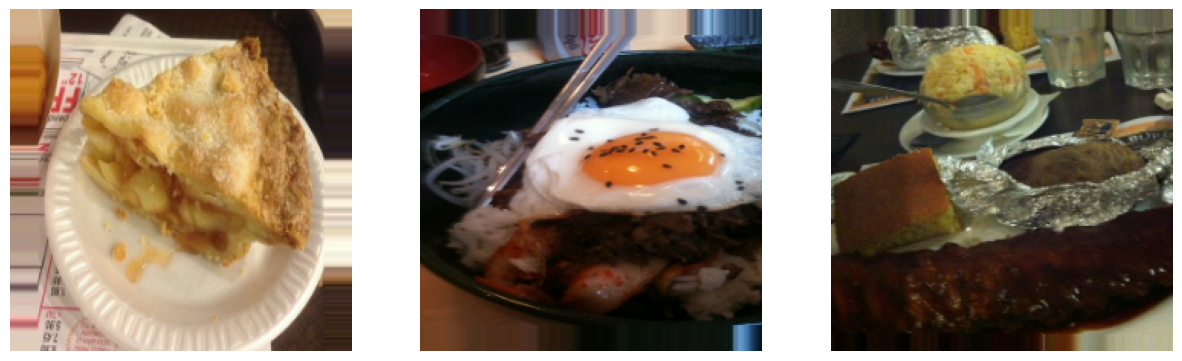

In [ ]:
#creation of varied training examples through real-time augmentations,
#improving the model's ability to generalize and perform well on unseen data

datagen = ImageDataGenerator(zoom_range =0.2,horizontal_flip=True)

# Load an image
img_sample = train_data.take(1)

for img,label in img_sample:
  img,label


# iterator
aug_iter = datagen.flow(img, batch_size=32)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')

	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')



In [ ]:
aug_iter#real-time generation of augmented images

Setting a random seed, defining image size, and creating a data augmentation layer

It ensures reproducibility, standardizes input sizes, and applies real-time augmentations that enhance the model's ability to generalize and perform well on unseen data

In [ ]:
# Add Data Augmentation on the data as a layer (has benefits while using GPU)
tf.random.set_seed(42)
IMG_SIZE = (224,224)
data_augmentation = tf.keras.Sequential([
    layers.Input(shape = IMG_SIZE +(3,)),
    layers.RandomFlip('horizontal'),
    layers.RandomZoom(0.2),
    # layers.RandomRotation(0.2),
    # layers.RandomHeight(0.2),
    # layers.RandomWidth(0.2)
],name = 'data_augmentation')

`creating and compiling a deep learning model for the food image classification project.`

It sets up the model architecture using EfficientNetB0 as a base, incorporates data augmentation, and compiles the model with appropriate settings for training.

By leveraging a pre-trained model and customizing the output layer, the project can achieve higher accuracy and better performance in classifying food items, ultimately contributing to improved operational efficiency

In [ ]:
# Finding our best base model to proceed with fine-tuning
tf.random.set_seed(42)

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Creating a Functional API model
inputs = layers.Input(shape=input_shape,name = "input_layer")


x = data_augmentation(inputs)
x = base_model(inputs,training=False) # Just to enforce no updating the model weights
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)

# To make sure the output tensors are in float 32 for numerical stability
outputs = layers.Activation('softmax',dtype=tf.float32,name='Softmax_layer')(x)
model2 = tf.keras.Model(inputs,outputs)

# Compile model
model2.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001))

 `updating the training configuration, initializing W&B for experiment tracking, and executing the model training process`
  It allows for effective management of hyperparameters, ensures reproducibility, and provides real-time monitoring of model performance. By leveraging W&B, the project can achieve better insights into model performance

In [ ]:
# Update the epochs
configs['epochs'] = 6

# run =wandb.init(
#     project = 'Food-Image-Classification',
#     config =configs
# )
tf.random.set_seed(42)


# Using the exact replica of the Transfer learning data
Big_vision_history =model2.fit(
    train_data,
    steps_per_epoch = int((0.5*len(train_data))), # 50% data
    epochs = configs['epochs'],
    validation_data = test_data.repeat(),
    validation_steps= int(0.15*len(test_data)), # 15 % of the data
    # callbacks =[WandbMetricsLogger(log_freq =10)]
)
# run.finish()


Epoch 1/6
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 110s 73ms/step - accuracy: 0.4063 - loss: 2.6846 - val_accuracy: 0.6663 - val_loss: 1.3021
Epoch 2/6
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 138s 117ms/step - accuracy: 0.6094 - loss: 1.5432 - val_accuracy: 0.6986 - val_loss: 1.1304
Epoch 3/6
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - accuracy: 0.6676 - loss: 1.3010 - val_accuracy: 0.7068 - val_loss: 1.0707
Epoch 4/6
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - accuracy: 0.6676 - loss: 1.2874 - val_accuracy: 0.7238 - val_loss: 1.0315
Epoch 5/6
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.7023 - loss: 1.1470 - val_accuracy: 0.7209 - val_loss: 1.0307
Epoch 6/6
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - accuracy: 0.6993 - loss: 1.1491 - val_accuracy: 0.7214 - val_loss: 0.9879


**model2.evaluate(test_data)** ; It provides critical insights into the model's generalization capabilities, allows for benchmarking against previous models, and serves as a final validation step before deployment.

In [ ]:
model2.evaluate(test_data)# assessing the performance of the trained model on unseen data

790/790 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.7227 - loss: 0.9965


[0.9940141439437866, 0.7287128567695618]

**RandomFlip and RandomZoom** -is essential for enhancing the food image classification project. Visualizing the augmented images generated by this model is crucial for understanding the effects of the augmentation techniques, ensuring the quality of the augmented data, enhancing model robustness, and facilitating communication within the team. By effectively visualizing and analyzing augmented images, the project can achieve higher accuracy and better performance in classifying food items,

In [ ]:
# Visualize the augmented Images
data_augmented=tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomZoom(0.2)
])



In [ ]:
Another_sample=train_data.take(1)

for image,label in Another_sample:
  image,label


ensure that the image is formatted correctly for the model, including adding a batch dimension and casting the data type to float32. This preparation step is crucial for making accurate predictions and leveraging the trained model effectively.

In [ ]:
new_image =image[1]
# Add the image to a batch.
image = tf.cast(tf.expand_dims(new_image, 0), tf.float32)

allows for the verification of the image data type and the range of pixel values, which are critical for ensuring that the image is in the correct format for model input. By performing this inspection, you can identify potential issues with the image data, ensuring that the model receives high-quality input for accurate predictions

In [ ]:
imag = image[0].numpy()
print(f"Data Type: {imag.dtype}, Min: {imag.min()}, Max: {imag.max()}")

Data Type: float32, Min: 1.0714623928070068, Max: 255.0


In [ ]:
# plt.figure(figsize=(10, 10))
# for i in range(9):
#   augmented_image = data_augmented(image)
#   ax = plt.subplot(3, 3, i + 1)
#   # Convert to numpy and check the value range
#   img = augmented_image[0].numpy()  # Convert from Tensor to NumPy array

#   if img.dtype == 'float32' or img.dtype == 'float64':  # Normalize if necessary
#         img = img.clip(0, 1)  # Ensure values are within [0,1] if float

#   plt.imshow(img)
#   plt.axis("off")

## Fine tuning (Warm Up)

More on [**fine tuning**](https://pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/)

### Model 0 (Baseline model)

**Properties of the model**
- Feature-extraction
- Has a dropout layer
- Data Augmentation
- lr = 0.001
- Epoch 5-10
- Dataset 10%-50%

**Callbacks**
WandbMetric Logger


In [ ]:
# Install and prepare  wandb metrics
import wandb

from wandb.integration.keras import WandbMetricsLogger

# configs for the weights and biases
configs =dict(
    batch_size =32,
    num_classes =len(class_names),
    shuffle_buffer = 1000,
    image_size = 224,
    image_channels = 3,
    earlystopping_patience =3,
    learning_rate = 1e-3,
    dataset_size = 0.1, # Train_data
    epochs = 5, # to be changed for the different models
    fine_tuned = 0
)


In [ ]:
# Finding our best base model to proceed with fine-tuning
tf.random.set_seed(42)

input_shape = (configs['image_size'],configs['image_size'],configs['image_channels'])
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Creating a Functional API model
inputs = layers.Input(shape=input_shape,name = "input_layer")


# x = data_augmentation(inputs)
x = base_model(inputs,training=False) # Just to enforce no updating the model weights
x = layers.GlobalAveragePooling2D()(x)
x= layers.Dropout(.2)(x) # Reguralization
x = layers.Dense(len(class_names))(x)

# To make sure the output tensors are in float 32 for numerical stability
outputs = layers.Activation('softmax',dtype=tf.float32,name='Softmax_layer')(x)
model = tf.keras.Model(inputs,outputs)

# Compile model

model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer= tf.keras.optimizers.Adam(learning_rate=configs['learning_rate']))

In [ ]:
configs['epochs'] = 5
configs['dataset_size'] = 0.5
# run =wandb.init(
#     project = 'Final-tuning',
#     config =configs
# )


# Using the exact replica of the Transfer learning data
Big_vision_history =model.fit(
    train_data,
    steps_per_epoch = int((configs['dataset_size']*len(train_data))), # 20% data
    epochs = configs['epochs'],
    validation_data = test_data.repeat(),
    validation_steps= int(0.15*len(test_data)), # 15 % of the data
    # callbacks =[WandbMetricsLogger(log_freq =10)]
)
# run.finish()

Epoch 1/5
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.3834 - loss: 2.7713 - val_accuracy: 0.6525 - val_loss: 1.3379
Epoch 2/5
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 138s 117ms/step - accuracy: 0.5879 - loss: 1.6206 - val_accuracy: 0.6928 - val_loss: 1.1488
Epoch 3/5
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - accuracy: 0.6377 - loss: 1.4076 - val_accuracy: 0.7013 - val_loss: 1.1060
Epoch 4/5
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 77s 65ms/step - accuracy: 0.6451 - loss: 1.3620 - val_accuracy: 0.7185 - val_loss: 1.0483
Epoch 5/5
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 142s 80ms/step - accuracy: 0.6724 - loss: 1.2677 - val_accuracy: 0.7156 - val_loss: 1.0409


In [ ]:
plot_loss_curves(Big_vision_history)

NameError: name 'plot_loss_curves' is not defined

### Model 1

**Properties of the model**

- Fine-tuned
- Has a dropout layer
- Data Augmentation
- lr = 1e-4 (-) 1e-7
- Epoch 5-10
- Dataset 10%-100%

**Callbacks**
WandbMetric Logger
learning_rate scheduler
Model checkpoints


#### Callbacks

In [ ]:
# Create ModelCheckpoint callback to save model's progress
# checkpoint_path = "fine_tune_checkpoints" # saving weights requires ".ckpt" extension
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
#                                                       monitor="val_accuracy", # save the model weights with best validation accuracy
#                                                       save_best_only=True,
#                                                       verbose=0) # don't print out whether or not model is being saved

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=configs['earlystopping_patience'],
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)


In [ ]:
import tensorflow.keras as layers

In [ ]:
# Unfreezing 3 of the layers
# Unfreeze the last 3 layers
base_model.trainable = True # unfreeze all the layers

for layer_number,layer in enumerate(model.layers[1].layers[:-3]):
  layer.trainable = False # Freeze all the layers except the last two layers

for layer_number,layer in enumerate(model.layers[1].layers[-10:]):
  print(layer_number,layer.trainable,layer.dtype_policy)

0 False <DTypePolicy "mixed_float16">
1 False <DTypePolicy "mixed_float16">
2 False <DTypePolicy "mixed_float16">
3 False <DTypePolicy "mixed_float16">
4 False <DTypePolicy "mixed_float16">
5 False <DTypePolicy "mixed_float16">
6 False <DTypePolicy "mixed_float16">
7 True <DTypePolicy "mixed_float16">
8 True <DTypePolicy "mixed_float16">
9 True <DTypePolicy "mixed_float16">


In [ ]:
# Recompile the model
configs['learning_rate'] = 0.00001
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer =tf.keras.optimizers.Adam(learning_rate = configs['learning_rate']))

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_7 (Cast)                        │ (None, 101)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax_layer (Activation)           │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 541,541 (2.07 MB)

 Non-trainable params: 3,637,411 (13.88 MB)

In [ ]:
configs['epochs'] = 7
configs['dataset_size'] = 0.3
configs['earlystopping_patience'] = 2
# run =wandb.init(
#     project = 'Finetuning-Food-101',
#     config =configs
# )
# Using the exact replica of the Transfer learning data
initialepoch = configs['epochs'] =
finalepoch = initialepoch + 5
Big_vision_history1 =model.fit(
    train_data,
    steps_per_epoch = int((configs['dataset_size']*len(train_data))), # 50% data
    epochs = configs['epochs'],
    validation_data = test_data.repeat(),
    validation_steps= int(0.15*len(test_data)), # 15 % of the data
    callbacks =[reduce_lr]
)
# run.finish()

Epoch 1/7
710/710 ━━━━━━━━━━━━━━━━━━━━ 85s 80ms/step - accuracy: 0.6511 - loss: 1.3465 - val_accuracy: 0.7039 - val_loss: 1.1156 - learning_rate: 1.0000e-05
Epoch 2/7
710/710 ━━━━━━━━━━━━━━━━━━━━ 51s 71ms/step - accuracy: 0.6791 - loss: 1.2459 - val_accuracy: 0.7124 - val_loss: 1.0750 - learning_rate: 1.0000e-05
Epoch 3/7
710/710 ━━━━━━━━━━━━━━━━━━━━ 50s 70ms/step - accuracy: 0.6674 - loss: 1.2857 - val_accuracy: 0.7195 - val_loss: 1.0549 - learning_rate: 1.0000e-05
Epoch 4/7
238/710 ━━━━━━━━━━━━━━━━━━━━ 47s 102ms/step - accuracy: 0.6780 - loss: 1.2243

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


710/710 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.6816 - loss: 1.2235 - val_accuracy: 0.7190 - val_loss: 1.0587 - learning_rate: 1.0000e-05
Epoch 5/7
710/710 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.6772 - loss: 1.2484 - val_accuracy: 0.7219 - val_loss: 1.0459 - learning_rate: 1.0000e-05
Epoch 6/7
710/710 ━━━━━━━━━━━━━━━━━━━━ 54s 76ms/step - accuracy: 0.6929 - loss: 1.1853 - val_accuracy: 0.7240 - val_loss: 1.0311 - learning_rate: 1.0000e-05
Epoch 7/7
710/710 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.6928 - loss: 1.2060 - val_accuracy: 0.7262 - val_loss: 1.0250 - learning_rate: 1.0000e-05


In [ ]:

import gdown
file_id = "1M2CJIHoTbsMhCg_dFLzoYWNLkLDaY-ZL"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Functions.py", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1M2CJIHoTbsMhCg_dFLzoYWNLkLDaY-ZL
From (redirected): https://drive.google.com/uc?id=1M2CJIHoTbsMhCg_dFLzoYWNLkLDaY-ZL&confirm=t&uuid=9e96ee0c-e8df-4e4a-a664-02c6641480d8
To: /content/Functions.py
100%|██████████| 5.29k/5.29k [00:00<00:00, 11.1MB/s]


'Functions.py'

from Functions import load_and_prep_image,pred_and_plot,make_confusion_matrix,plot_loss_curves

In [ ]:
import gdown
file_id = "1SK5J2a3hWoCuCLdJzpA1G-PdtJEqDtyf"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "Best_model.keras", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1SK5J2a3hWoCuCLdJzpA1G-PdtJEqDtyf
From (redirected): https://drive.google.com/uc?id=1SK5J2a3hWoCuCLdJzpA1G-PdtJEqDtyf&confirm=t&uuid=55bf4c23-8316-49c0-b36a-7b9f79171dd8
To: /content/Best_model.keras
100%|██████████| 26.2M/26.2M [00:00<00:00, 48.4MB/s]


'Best_model.keras'

In [ ]:
from Functions import load_and_prep_image,pred_and_plot,make_confusion_matrix,plot_loss_curves, compare_historys, unzip_data, walk_through_dir

In [ ]:
compare_historys(Big_vision_history,Big_vision_history1)

In [ ]:
import tensorflow as tf
best_model = tf.keras.models.load_model('Best_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Load 101 food dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
# Unzip_data
unzip_data('/content/101_food_classes_10_percent.zip')

In [ ]:
import os
import random

In [ ]:
# Walk through directory
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/spring_rolls'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/seaweed_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/gyoza'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/ravioli'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/falafel'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/breakfast_burrito'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/greek_salad'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/tacos'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/prime_rib'.
There are 0 directories and 250 images in '101_food_cl

In [ ]:
train_dir = '/content/101_food_classes_10_percent/train/'
test_dir = '/content/101_food_classes_10_percent/test/'

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE =(224,224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                image_size = IMG_SIZE,
                                                                                label_mode ='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size =IMG_SIZE,
                                                                shuffle = False, # For prediction analysis
                                                                label_mode ='categorical')

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
best_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_1 (Cast)                        │ (None, 101)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax_layer (Activation)           │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,262,036 (20.07 MB)

 Trainable params: 541,541 (2.07 MB)

 Non-trainable params: 3,637,411 (13.88 MB)

 Optimizer params: 1,083,084 (4.13 MB)

## Making predictions with our trained model

In [ ]:
# Make predction with our model
preds_prob = best_model.predict(test_data,verbose = 1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 64s 75ms/step


In [ ]:
# Get the pred_classes for each label
pred_classes =preds_prob.argmax(axis =1)

# How do they look?
pred_classes[:10]


array([85,  0, 97,  0,  0,  0, 21,  0,  2, 41])

In [ ]:
# To get our test labels we need to unravel our test_data batchDataset
y_labels =[]
for images,labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # Currently test labels are in this shape [0,0,0,0,0,0,0,0,0,1,...,0,0,0]

y_labels[:10] # Look at the first 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# How many y_labels are there
len(y_labels)

25250

## Evaluating our model predictions

One way to check that our model's predictions array is in the same order as our test labels array is to find the accuracy score

In [ ]:
# Let's try scikit-learn's accuracy score function and see what it comes up with
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred =pred_classes)
sklearn_accuracy

0.755960396039604

## Let's get visual:making a confusion matrix

In [ ]:
# Get the list of class_names
Class_names = test_data.class_names
Class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
make_confusion_matrix(y_true =y_labels,
                      y_pred =pred_classes,
                      classes = Class_names,
                      figsize = (100,100),
                      text_size =20,
                      savefig =True)

## Let's keep the evaluation train going, time for a classification report

Scikit-learn has a helpful function for acquiring many different classification metrics per class (e.g. precision, recall and F1) called [classification _report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true =y_labels,
                            y_pred = pred_classes))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53       250
           1       0.74      0.76      0.75       250
           2       0.82      0.81      0.82       250
           3       0.83      0.78      0.81       250
           4       0.69      0.66      0.68       250
           5       0.62      0.66      0.64       250
           6       0.82      0.88      0.85       250
           7       0.88      0.92      0.90       250
           8       0.50      0.64      0.56       250
           9       0.76      0.65      0.70       250
          10       0.66      0.63      0.65       250
          11       0.82      0.86      0.84       250
          12       0.83      0.80      0.81       250
          13       0.77      0.74      0.75       250
          14       0.78      0.76      0.77       250
          15       0.64      0.60      0.62       250
          16       0.02      0.02      0.02       250
          17       0.02    

The numbers above give a great class-by-class evaluation of our model's predictions but with so many classes, they're quite hard to understand.

How about we create a visualization to get a better understanding?

In [ ]:
# Get a dictionary of the classification report
classification_report_dict=classification_report(y_labels,
                      pred_classes,
                      output_dict=True)

 Let's plot all of our classes F1 scores

In [ ]:
# Create empty dictionary
class_f1_score ={}
# Loop through classification report dictionary items
for k,v in classification_report_dict.items():
  if k == 'accuracy': # stop once we get to accuracy key
    break
  else:
    # Add class names and f1 scores to new dictionary
    class_f1_score[Class_names[int(k)]]= v['f1-score']
class_f1_score

{'apple_pie': 0.5263157894736842,
 'baby_back_ribs': 0.7509881422924901,
 'baklava': 0.8152610441767069,
 'beef_carpaccio': 0.8057851239669421,
 'beef_tartare': 0.6775510204081633,
 'beet_salad': 0.6407766990291263,
 'beignets': 0.85,
 'bibimbap': 0.899803536345776,
 'bread_pudding': 0.5598591549295775,
 'breakfast_burrito': 0.7010752688172043,
 'bruschetta': 0.6475409836065574,
 'caesar_salad': 0.8382066276803118,
 'cannoli': 0.8130081300813008,
 'caprese_salad': 0.7540983606557377,
 'carrot_cake': 0.7717171717171717,
 'ceviche': 0.6172839506172839,
 'cheese_plate': 0.016227180527383367,
 'cheesecake': 0.016632016632016633,
 'chicken_curry': 0.6972477064220184,
 'chicken_quesadilla': 0.7864271457085829,
 'chicken_wings': 0.8435643564356435,
 'chocolate_cake': 0.6887966804979253,
 'chocolate_mousse': 0.5816135084427767,
 'churros': 0.8647540983606558,
 'clam_chowder': 0.8457142857142858,
 'club_sandwich': 0.8145161290322581,
 'crab_cakes': 0.6666666666666666,
 'creme_brulee': 0.8737060

In [ ]:
# Turn f1-scores into dataframes for visualization
import pandas as pd
f1_score =pd.DataFrame({'class_names':list(class_f1_score.keys()),
                        'f1-score':list(class_f1_score.values())}).sort_values('f1-score',ascending = False)

In [ ]:
f1_score[:10] # View the first ten classes

class_names  f1-score
33              edamame  0.989940
63             macarons  0.955285
69              oysters  0.925781
91  spaghetti_carbonara  0.920000
54    hot_and_sour_soup  0.916000
65              mussels  0.908714
75                  pho  0.906931
64            miso_soup  0.905812
45        frozen_yogurt  0.904215
7              bibimbap  0.899804

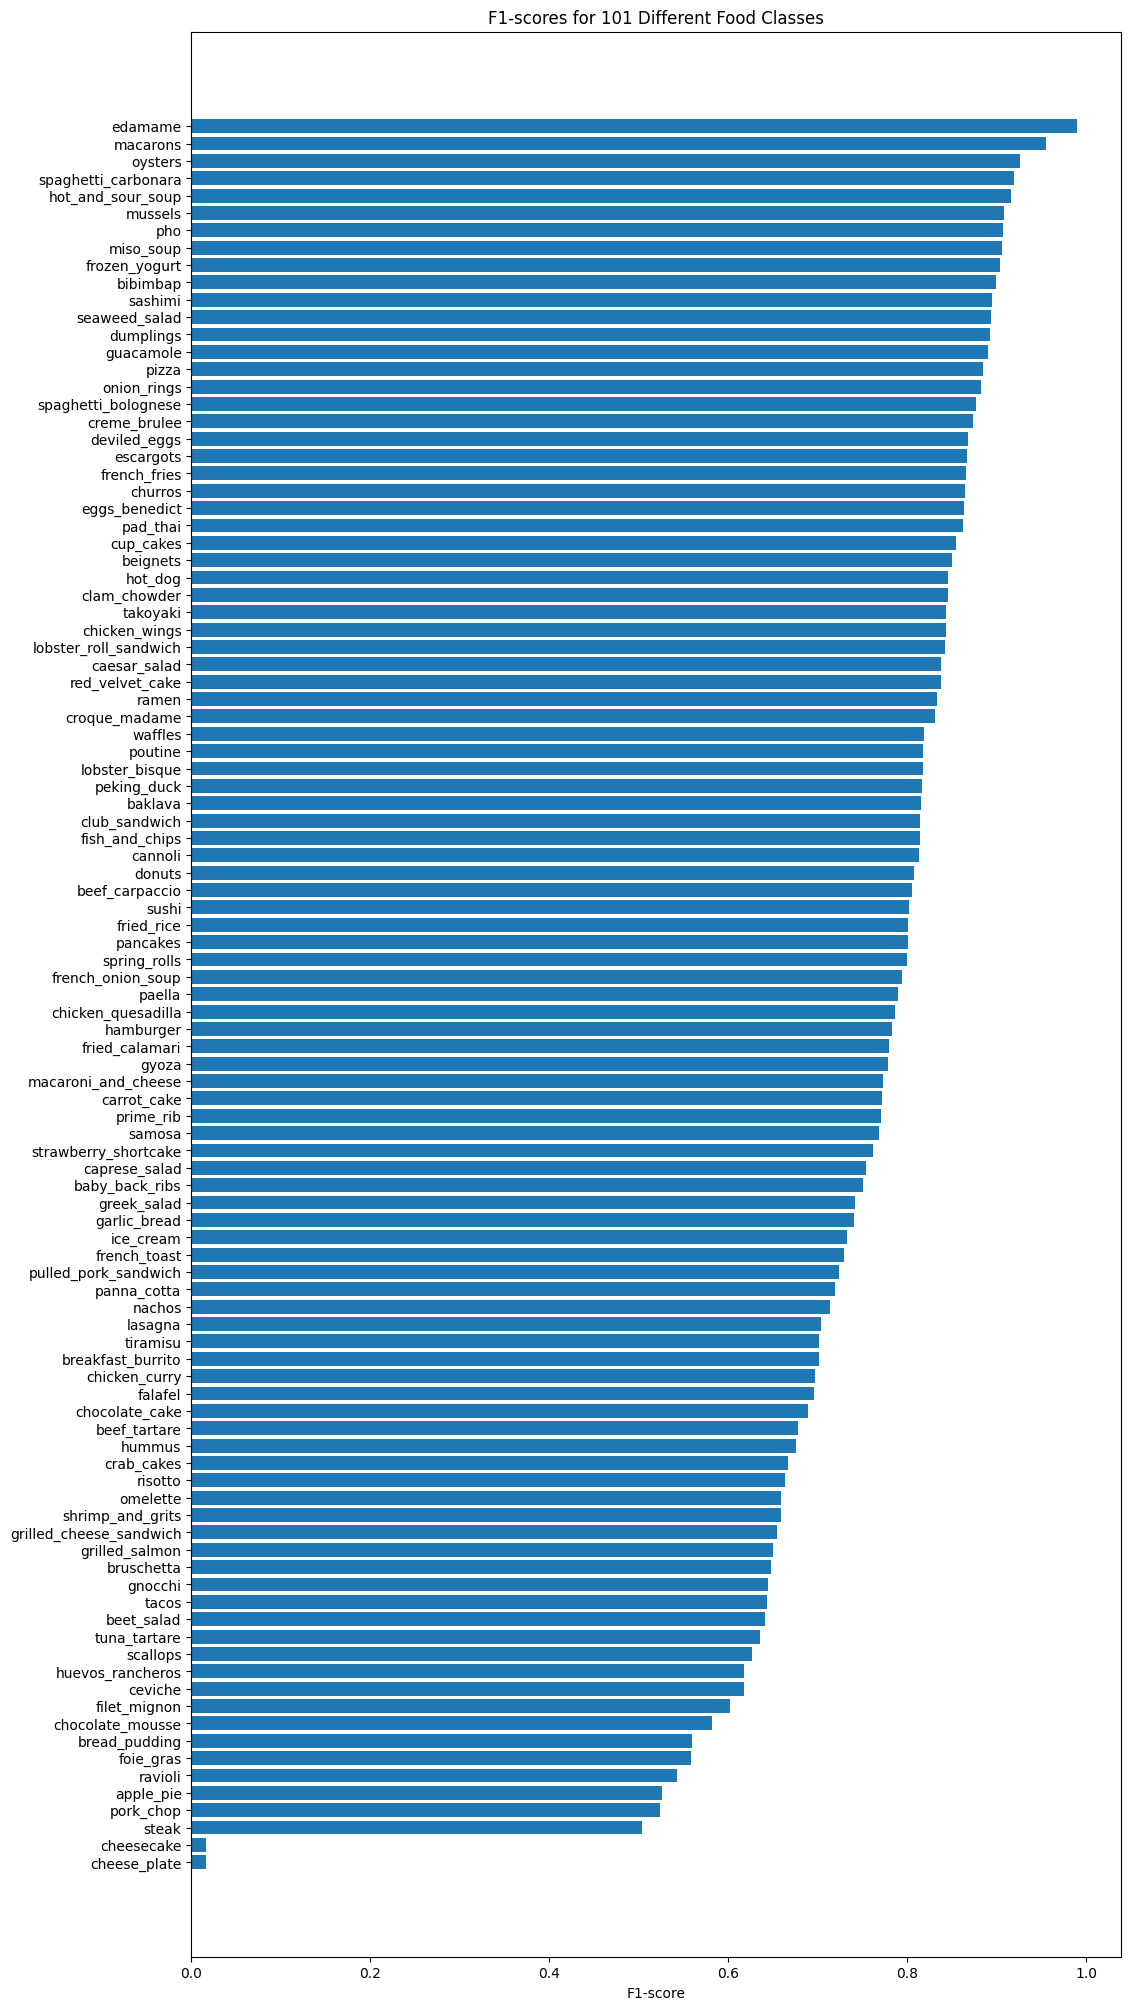

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (12,25))
scores = ax.barh(range(len(f1_score)),f1_score['f1-score'].values) # get f1-scores value
ax.set_yticks(range(len(f1_score)))
ax.set_yticklabels(f1_score['class_names']);
ax.set_xlabel('F1-score')
ax.set_title('F1-scores for 101 Different Food Classes')
ax.invert_yaxis() # reverse the order of our plot

# Challenge: Add values to the end of each bar of what the actual f1-score is

# def autolabel(rects):
#   """
#   Attach a text label above each bar displaying its height
#   """
#   for rect in rects:
#     height =rect.get_height()
#     ax.text(rect.get_x()+rect.get_width()/2.,1.05*height,
#             '%d' % int(height),
#             ha ='center' , va ='bottom')

# autolabel(scores)

## Visualizing predictions on test images

Now, this is the real test,how does our model go on food images not even in our test dataset (images of our own, we'll see this later on).

To visualize our model's predictions on our own images, we'll need a function to load and preprocess images, specifically it will need to:
* Read an target image filepath using tf.io.read_file()
* Turn the image into a Tensor using tf.io.decode_image()
* Resize the image tensor to be the same size as the images our model has trained on using tf.image.resize()
* Scale the image to get all of the pixel values between 0 & 1 (if necessary)



In [ ]:
# Create a function to load and prepare images
def load_and_prep_image(filename,img_shape = 224,scale =True):
  """
  Reads an image from a filename, turns into a tensor and reshapes into
  specified shape (img_shape,color_channels = 3).

  Args:
    filename(str): path to target image
    image_shape(int): height/width dimensionof target image size
    scale(bool): scale pixel values from 0-255 to 0-1 or not

  Returns:
    Image tensor of tensor of shape (img_shape,img_shape,3)
  """

  # Read in the image
  img =tf.io.read_file(filename)

  # Decode image into a tensor
  img =tf.io.decode_image(img,channels =3)

  # Resize image
  img =tf.image.resize(img,[img_shape,img_shape])

  # Scale? Yes/No
  if scale:
    # rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # For efficient net models no need to rescale images




Now we've got a function to load and prepare target images,let's now write some codes to visualize images, their target labels and our model's predictions.

Specifically, we'll write some code to:
1. Load a few random images from the test dataset
2. Make predicitions on the loaded images
3. Plot the original image(s) along with the model's predictions, prediction probability and truth label  

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


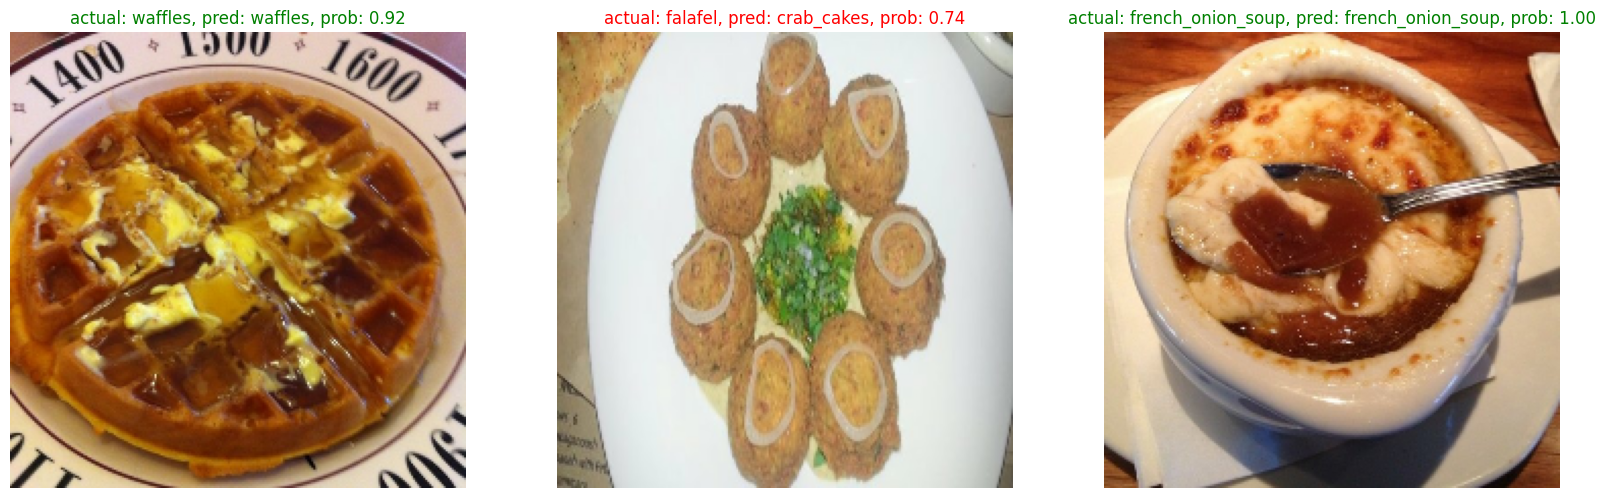

In [ ]:
# Make preds a series of random images
import os
import random
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(3):
  # Choose a random image(s) from a random class(es)
  class_name =random.choice(Class_names)
  filename =random.choice(os.listdir(test_dir + '/' + class_name))
  file_path =test_dir + class_name + '/' + filename

  # Load the image and make predictions
  img = load_and_prep_image(file_path,scale =False)
  image_expanded =tf.expand_dims(img,axis=0)
  pred_prob =best_model.predict(image_expanded)
  pred_class = Class_names[int((pred_prob).argmax())]

  # Plot the image(s)
  plt.subplot(1,3,i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Make text green
    title_color = 'g'
  else:
    title_color = 'r'
  plt.title(f'actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}',c =title_color)
  plt.axis('off')






## Finding the most wrong predictions

To find out where our model is most wrong , let's write some code to find out the following:

1. Get all of the image file paths in the test dataset using list_file() method
2. Create a pandas dataframe of the image filepaths, ground truth labels, predicted classes (from our model), max prediction probabilities, prediction class names, ground truth class names.
3. Use our DataFrame to find all the wrong predictions (Where the ground truth label doesn't match the predictions)

4. Sort the DataFrame based on wrong predictions (have the highest prediction probability predictions at the top).
5. Visualize the images with the highest prediction probabilities but have the wrong prediction.

In [ ]:
# Get all of the image file paths in the test data
filepaths = []

for filepath in test_data.list_files('/content/101_food_classes_10_percent/test/*/*.jpg',
                                     shuffle =False):
  filepaths.append(filepath.numpy()) # Use the numpy to get them in text format




In [ ]:
# 2. Create a DataFrame of different parameters for each of our test images
import pandas as pd
pred_df =pd.DataFrame({'img_path':filepaths,
                       'y_true':y_labels,
                       'y_pred': pred_classes,
                       'pred_conf': preds_prob.max(axis = 1), # get the maximum probability
                       'y_true_classname': [Class_names[i] for i in y_labels],
                       'y_pred_classname':[Class_names[i] for i in pred_classes]})


In [ ]:
# 3. Find out in our DataFrame which predictions are wrong
pred_df['pred_correct'] =pred_df['y_true'] ==pred_df['y_pred']
pred_df.head()


img_path  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0      85   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0      97   
3  b'/content/101_food_classes_10_percent/test/ap...       0       0   
4  b'/content/101_food_classes_10_percent/test/ap...       0       0   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.528390        apple_pie           samosa         False  
1   0.996730        apple_pie        apple_pie          True  
2   0.443116        apple_pie         takoyaki         False  
3   0.580625        apple_pie        apple_pie          True  
4   0.869622        apple_pie        apple_pie          True

In [ ]:
# 4. Sort our DataFrame to have the most wrong predictions at the top
top_100_wrong = pred_df[pred_df['pred_correct'] ==False].sort_values('pred_conf',ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
4423   b'/content/101_food_classes_10_percent/test/ch...      17      16   
4242   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4405   b'/content/101_food_classes_10_percent/test/ch...      17      16   
4228   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4189   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4183   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4191   b'/content/101_food_classes_10_percent/test/ch...      16      17   
16271  b'/content/101_food_classes_10_percent/test/mu...      65      69   
4140   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4188   b'/content/101_food_classes_10_percent/test/ch...      16      17   
11642  b'/content/101_food_classes_10_percent/test/ga...      46      10   
4212   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4486   b'/content/101_food_classes_10_percent/test/ch...      17      16   
4232   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4156   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4130   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4223   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4063   b'/content/101_food_classes_10_percent/test/ch...      16      17   
4257   b'/content/101_food_classes_10_percent/test/ch...      17      16   
4583   b'/content/101_food_classes_10_percent/test/ch...      18      60   

       pred_conf y_true_classname y_pred_classname  pred_correct  
4423    0.999976       cheesecake     cheese_plate         False  
4242    0.999952     cheese_plate       cheesecake         False  
4405    0.999845       cheesecake     cheese_plate         False  
4228    0.999812     cheese_plate       cheesecake         False  
4189    0.999795     cheese_plate       cheesecake         False  
4183    0.999788     cheese_plate       cheesecake         False  
4191    0.999704     cheese_plate       cheesecake         False  
16271   0.999678          mussels          oysters         False  
4140    0.999616     cheese_plate       cheesecake         False  
4188    0.999591     cheese_plate       cheesecake         False  
11642   0.999459     garlic_bread       bruschetta         False  
4212    0.999415     cheese_plate       cheesecake         False  
4486    0.999407       cheesecake     cheese_plate         False  
4232    0.999210     cheese_plate       cheesecake         False  
4156    0.999204     cheese_plate       cheesecake         False  
4130    0.999175     cheese_plate       cheesecake         False  
4223    0.999002     cheese_plate       cheesecake         False  
4063    0.998912     cheese_plate       cheesecake         False  
4257    0.998838       cheesecake     cheese_plate         False  
4583    0.998788    chicken_curry   lobster_bisque         False

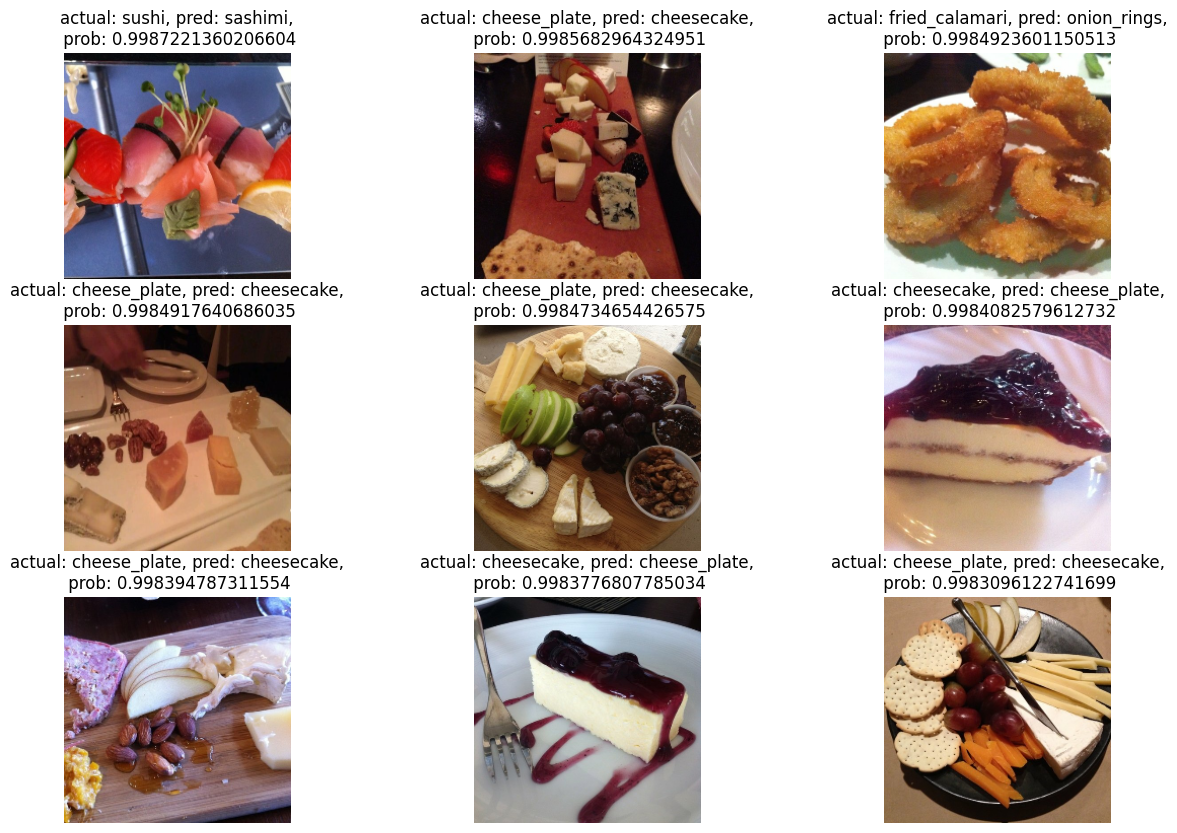

In [ ]:
# Visualize the images that have the highest prediction butwrong classes
import matplotlib.pyplot as plt

images_to_view = 9
start_index =20

plt.figure(figsize =(15,10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img =load_and_prep_image(row[1],scale=False)
  _, _, _, _, pred_prob, y_true_classname, y_pred_classname, _ = row #Only interested in a few parameters of each row
  plt.imshow(img/255.)
  plt.title(f'actual: {y_true_classname}, pred: {y_pred_classname},\n prob: {pred_prob}')
  plt.axis('off')


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import Model,layers
from tensorflow.keras.optimizers import Adam

In [ ]:
# Create data augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.2),
    layers.RandomFlip('horizontal')
])

In [ ]:
## Create a base model and compile it

# Step 1: Import EfficientB0 keras application
base_model = keras.applications.EfficientNetB7(include_top =False)
base_model.trainable =False

# Step 2: Create an input layer
inputs = layers.Input(shape=IMG_SIZE + (3,),name = 'input_layer')

# Step 3: Add the augmented layer
x = data_augmentation(inputs)

# Step 4: Add the base model layer
x = base_model(x,training =False)

#Step 5: Add the GlobalAverage pooling
x = layers.GlobalAveragePooling2D(name='global_pooling_layer')(x)

# Step 6: Output layer
outputs = layers.Dense(101,activation='softmax',name ='output_layer')(x)

# Step 7: Use the functional API to create model
model = keras.Model(inputs,outputs)

# Step 8: Compile model
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb7 (Functional)          │ (None, 7, 7, 2560)          │      64,097,687 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_pooling_layer                 │ (None, 2560)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         258,661 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,356,348 (245.50 MB)

 Trainable params: 258,661 (1010.39 KB)

 Non-trainable params: 64,097,687 (244.51 MB)

In [ ]:
keras.mixed_precision.set_dtype_policy('mixed_float16')

In [ ]:
# Fit the model
history_model=model.fit(train_data_all_10_percent,
          validation_data =test_data.repeat(),
          epochs =5,
          #initial_epoch = 5,
          validation_steps = int(0.15*len(test_data))
          )


Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 152s 641ms/step - accuracy: 0.5046 - loss: 2.0656 - val_accuracy: 0.4979 - val_loss: 2.0316
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 200s 841ms/step - accuracy: 0.5775 - loss: 1.6863 - val_accuracy: 0.5270 - val_loss: 1.8947
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 152s 640ms/step - accuracy: 0.6269 - loss: 1.4842 - val_accuracy: 0.5456 - val_loss: 1.8015
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 200s 632ms/step - accuracy: 0.6568 - loss: 1.3356 - val_accuracy: 0.5418 - val_loss: 1.7984
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 152s 643ms/step - accuracy: 0.6944 - loss: 1.2090 - val_accuracy: 0.5379 - val_loss: 1.8317


In [ ]:
model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 339s 429ms/step - accuracy: 0.5660 - loss: 1.6787


[1.5447508096694946, 0.5923960208892822]

In [ ]:
base_model.trainable = True

In [ ]:
## Redo the base model with transfer learning
for layer_number,layer in enumerate(model.layers[2].layers[:-3]):
  layer.trainable = False

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb7 (Functional)          │ (None, 7, 7, 2560)          │      64,097,687 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_pooling_layer                 │ (None, 2560)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 101)                 │         258,661 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,873,672 (247.47 MB)

 Trainable params: 1,902,181 (7.26 MB)

 Non-trainable params: 62,454,167 (238.24 MB)

 Optimizer params: 517,324 (1.97 MB)

In [ ]:
# Recompile the model
model.compile(optimizer =Adam(learning_rate= 0.0001),
              loss ='categorical_crossentropy',
              metrics =['accuracy'])

In [ ]:
# Fit the model
initialepoch=5
finalepoch = initialepoch + 5
history_model1 =model.fit(train_data_all_10_percent,
                          validation_data =test_data.repeat(),
                          epochs = finalepoch,
                          initial_epoch = 5 ,
                          validation_steps = int(0.15*len(test_data))
                          )

Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 195s 662ms/step - accuracy: 0.7167 - loss: 1.0625 - val_accuracy: 0.5625 - val_loss: 1.7058
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 194s 632ms/step - accuracy: 0.7740 - loss: 0.9089 - val_accuracy: 0.5755 - val_loss: 1.6749
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 261s 882ms/step - accuracy: 0.7944 - loss: 0.8190 - val_accuracy: 0.5781 - val_loss: 1.6624
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 203s 632ms/step - accuracy: 0.8201 - loss: 0.7437 - val_accuracy: 0.5744 - val_loss: 1.6674
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 153s 647ms/step - accuracy: 0.8362 - loss: 0.6712 - val_accuracy: 0.5832 - val_loss: 1.6501


In [ ]:
model.evaluate(test_data)

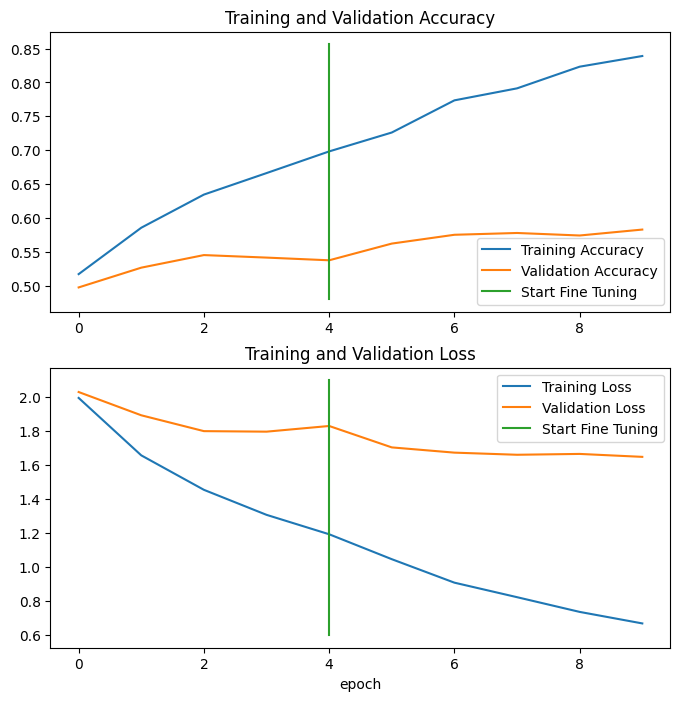

In [ ]:
compare_historys(history_model,history_model1,initial_epochs=5)

## Overfitting
Although we can see that model validation has an accuracy of 61% higher than the FoodVision paper we need to take into account our model also has problems.Overfitting in the transfer learning present.
Let's try to fix overfitting by
* **Get more data:** -increase the train_data to 30% of the data.
* **Data augmentation:** -  add more diversity to the train_data challenge the network more.
* **Transfer learning:** -leverage the `EfficientB7` pattern model on the FoodVision 101 data.